In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [ ]:
dp = pd.read_csv('/kaggle/input/drugs-a-b-c-x-y-for-decision-trees/drug200.csv')
dp.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
dp.drop_duplicates(inplace = True)

In [ ]:
dp.shape

(200, 6)

In [ ]:
dp.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [ ]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
dp.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
dp.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Drug', ylabel='count'>

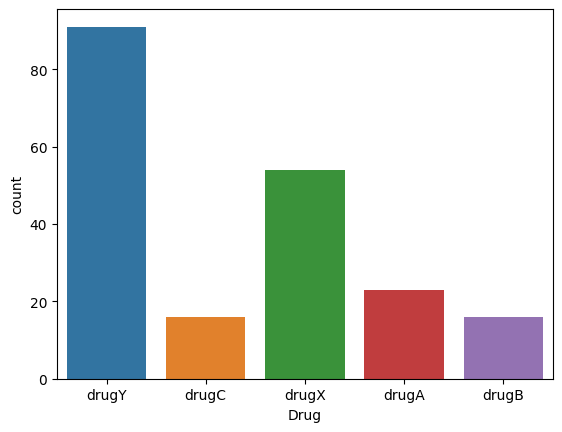

In [ ]:
sns.countplot(data = dp, x = 'Drug')

In [ ]:
le = LabelEncoder()
dp["Sex"] = le.fit_transform(dp[["Sex"]])
dp["BP"] = le.fit_transform(dp[["BP"]])
dp["Cholesterol"] = le.fit_transform(dp[["Cholesterol"]])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
dp.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


**One Hot Encoding**

In [ ]:
ohe = OneHotEncoder()
ohe_df = pd.DataFrame(ohe.fit_transform(dp[["Drug"]]).toarray(), columns = ["DrugA", "DrugB", "DrugC", "DrugX", "DrugY"])
final_data = dp.join(ohe_df, how="left")
final_data.drop(["Drug"], axis=1, inplace=True)

In [ ]:
X = final_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
Y = final_data[["DrugA", "DrugB", "DrugC", "DrugX", "DrugY"]]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.25, shuffle=True, random_state=42)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

[Text(0.625, 0.9, 'x[4] <= 14.829\ngini = 0.278\nsamples = 150\nvalue = [[133, 17]\n[138, 12]\n[138, 12]\n[109, 41]\n[82, 68]]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\ngini = 0.266\nsamples = 82\nvalue = [[65, 17]\n[70, 12]\n[70, 12]\n[41, 41]\n[82, 0]]'),
 Text(0.25, 0.5, 'x[0] <= 51.5\ngini = 0.194\nsamples = 29\nvalue = [[12, 17]\n[17, 12]\n[29, 0]\n[29, 0]\n[29, 0]]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 17\nvalue = [[0, 17]\n[17, 0]\n[17, 0]\n[17, 0]\n[17, 0]]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [[12, 0]\n[0, 12]\n[12, 0]\n[12, 0]\n[12, 0]]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\ngini = 0.14\nsamples = 53\nvalue = [[53, 0]\n[53, 0]\n[41, 12]\n[12, 41]\n[53, 0]]'),
 Text(0.625, 0.3, 'x[3] <= 0.5\ngini = 0.199\nsamples = 26\nvalue = [[26, 0]\n[26, 0]\n[14, 12]\n[12, 14]\n[26, 0]]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 12\nvalue = [[12, 0]\n[12, 0]\n[0, 12]\n[12, 0]\n[12, 0]]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 14\nvalue = [[14, 0]\n[14, 0]\n[14, 0]\n[0, 14]\n[14

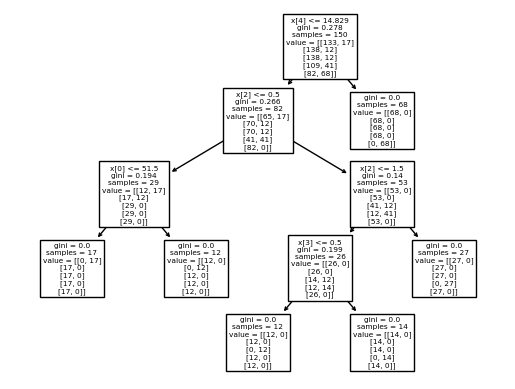

In [ ]:
plot_tree(dt)

In [ ]:
cm = multilabel_confusion_matrix(y_test, dt.predict(x_test))
cm

array([[[43,  1],
        [ 0,  6]],

       [[46,  0],
        [ 1,  3]],

       [[46,  0],
        [ 0,  4]],

       [[37,  0],
        [ 0, 13]],

       [[27,  0],
        [ 0, 23]]])

In [ ]:
report = classification_report(y_test, dt.predict(x_test))

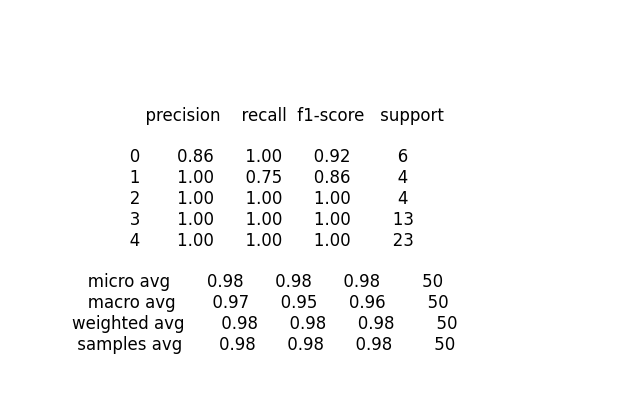

In [ ]:
plt.figure(figsize=(8, len(report.split('\n'))*0.4))  # Adjust the height as needed
plt.text(0.1, 0.1, report, fontdict={"fontsize": 12})  # Adjust fontsize and fontfamily as needed
plt.axis('off')  # Hide the axis
plt.show()

In [ ]:
accuracy_score(y_test, dt.predict(x_test))

0.98

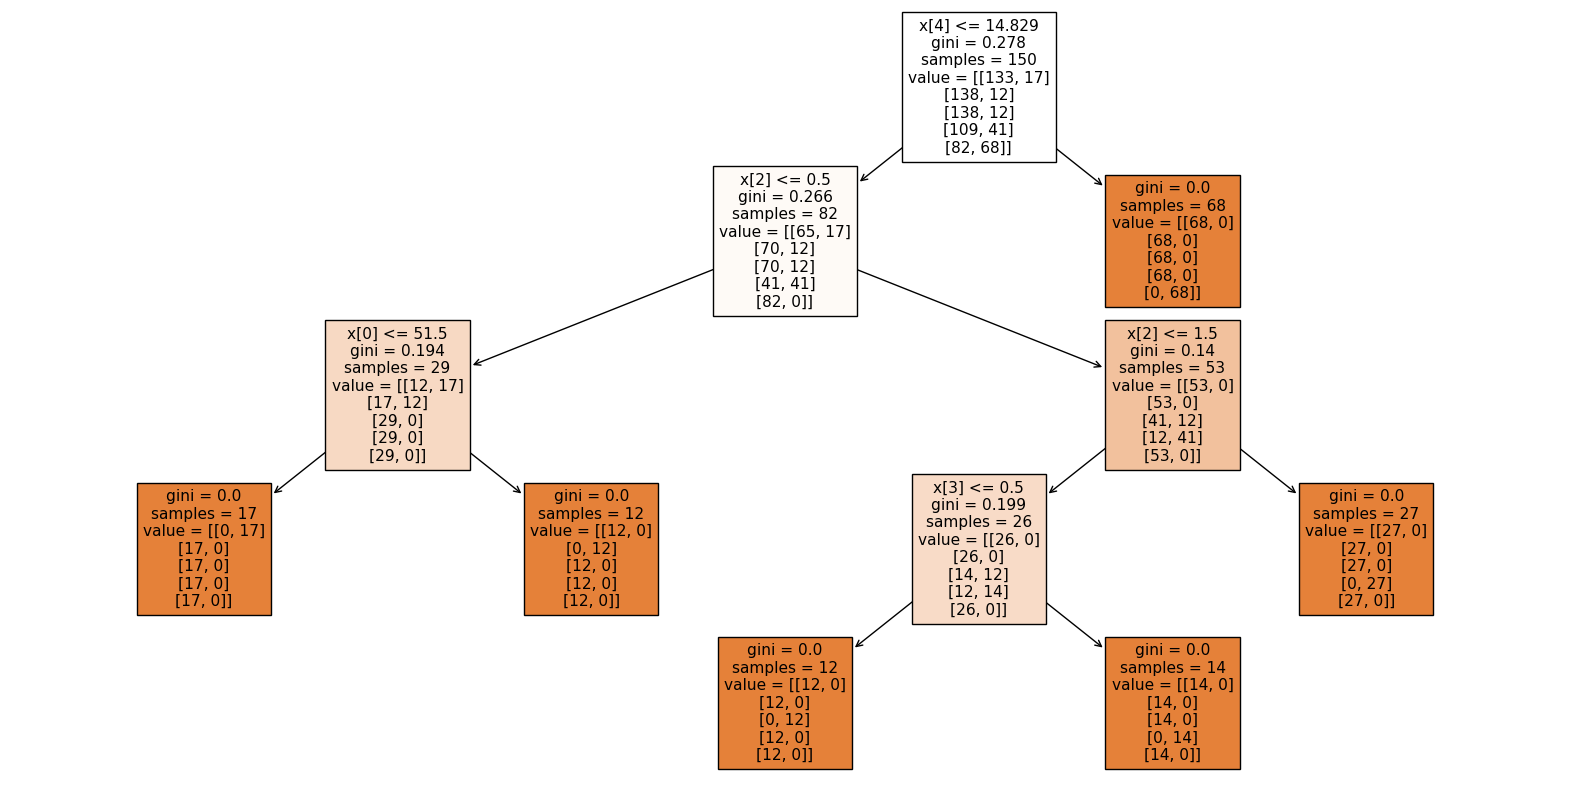

In [ ]:
from sklearn.tree import plot_tree
unique_classes = np.unique(y_train)
plt.figure(figsize=(20,10))
plot_tree(dt, class_names=unique_classes, filled=True)
plt.show()